 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Max Henning Höth
**ID Number**: 2055977


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
IDnumber = 2055977 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [29]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.

Y_test = np.array

while np.sum(Y_test==-1) < 10 or np.sum(Y_test==1) < 10:
    training_part = 0.75
    
    X = X[permutation]
    Y = Y[permutation]

    # m_test needs to be the number of samples in the test set
    m_training = int(training_part * m)

    # m_test needs to be the number of samples in the test set
    m_test = int((1 - training_part) * m)

    # X_training = instances for training set
    X_training = X[:m_training]

    #Y_training = labels for the training set
    Y_training = Y[:m_training]

    # X_test = instances for test set
    X_test = X[m_training:]

    # Y_test = labels for the test set
    
    Y_test = Y[m_training:]
    

    

print(Y_training) # to make sure that Y_training contains both 1 and -1
print(m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[ 1  1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1
  1  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1  1  1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1
 -1 -1  1 -1 -1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1
  1 -1 -1  1  1  1]
50

Number of classical instances in test: 24
Number of metal instances in test: 26
Shape of training set: (150, 3)
Shape of test set: (50, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [30]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[1.00000000e+00 1.51999081e+02 4.22520490e-01 2.46447095e+03]
 [1.00000000e+00 1.23046875e+02 4.72493846e-01 2.71001460e+03]
 [1.00000000e+00 1.07666016e+02 4.63511012e-01 3.01081626e+03]
 [1.00000000e+00 1.51999081e+02 3.19262862e-01 1.01627941e+03]
 [1.00000000e+00 1.03359375e+02 3.11586873e-01 2.22487016e+03]
 [1.00000000e+00 1.17453835e+02 4.57425500e-01 2.34061612e+03]
 [1.00000000e+00 7.17773438e+01 2.34236042e-01 1.52664707e+03]
 [1.00000000e+00 9.93840144e+01 4.95874143e-01 2.65818516e+03]
 [1.00000000e+00 9.57031250e+01 3.19468121e-01 1.71244608e+03]
 [1.00000000e+00 1.51999081e+02 4.40919990e-01 2.74111811e+03]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [31]:
# A template is provided, but feel free to build a different implementation

def perceptron_update(x, y, current_w):
    # Place in this function the update rule of the perceptron algorithm
        new_w = current_w + np.dot(y, x)
        return new_w

    

def perceptron(X, Y, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros(4)
    best_w = 0
    num_samples = len(X)
    error = 0
    best_error = 1
    index_misclassified = 1 #will be ovewritten
    num_misclassified = 0 #will be ovewritten
    
    
    #main loop continue until all samples correctly classified or max # iterations reached
    
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        index_misclassified = 1
        num_misclassified = 0
        
        # avoid working always on the same sample, you can use a random permutation or randomize the choice of misclassified
        
    
        misclassified = []
        
        for i in range(num_samples):
            x = np.random.choice(num_samples) - 1
            if Y[x] * (np.dot(curr_w, X[x])) <= 0:
                num_misclassified += 1
                misclassified.append([Y[x], X[x]])
        error = len(misclassified)/len(X)
        
        if len(misclassified) == 0:
            index_misclassified = -1
        
            # check if the i-th randomly selected sample is misclassified
            # store the number of randomly classified samples and the index of at least one of them
                
        if error < best_error:
            best_w = curr_w
            best_error = error
        
        
        # PLACE YOUR CODE
    
        num_iter += 1
        
        #call update function using a misclassifed sample
        for i in misclassified:
            curr_w = perceptron_update(i[0], i[1], curr_w)
            #print(curr_w, X[i], Y[i], '\n')
        
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [32]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))
print(w_found)

Training Error of perpceptron (100 iterations): 0.12666666666666668
[-1.51000000e+02 -1.95922053e+04 -5.96769434e+00  1.33179819e+03]


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [33]:
#now use the w_found to make predictions on test dataset

num_errors = 0

for i in range(len(X_test)):
    if Y_test[i] * (np.dot(w_found, X_test[i])) <= 0:
        num_errors += 1
                

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 0.14


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**

The difference between the error of the test and training set is relatively small. In both sets are round about 12% to 15% misclassified samples. This could be due to too less samples, not enough iterations or just because the sets are not completely linear separable. But because the difference is not so big we can see that the Model is not overfitted.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [34]:
#now run the perceptron for 4000 iterations here!

num_errors = 0

w_found, error = perceptron(X_training,Y_training, 4000)

for i in range(len(X_test)):
    if Y_test[i] * (np.dot(w_found, X_test[i])) <= 0:
        num_errors += 1

true_loss_estimate = num_errors/m_test

print("Training Error of perpceptron (4000 iterations): " + str(error))
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

Training Error of perpceptron (4000 iterations): 0.03333333333333333
Test Error of perpceptron (4000 iterations): 0.14


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**

In this case the difference of the errors are way larger. So the Model is fitting the Training set mostly perfect but not the Test set. The error of the test set is the same as before so the increasing number of iterations is just lowering the error of the training set and not the test set even after several tries the error of the test set after 400 iterations is always around the error after 100 iterations.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [37]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [38]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.


Y_test = np.array

while np.sum(Y_test==-1) < 10 or np.sum(Y_test==1) < 10:
    training_part = 0.75
    

    m_training = int(training_part * m)
    m_test = int(m * (1 - training_part))

    X_training = X[:m_training]
    Y_training = Y[:m_training]

    X_test = X[m_training:]
    Y_test = Y[m_training:]


print("Number of samples in the test set:", m_test)
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

Number of samples in the test set: 50

Number of classical instances in test: 25
Number of metal instances in test: 25

Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [39]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set

logreg.fit(X_training, Y_training)

# predict from training set
errors = 0

for x, y in zip(logreg.predict(X_training), Y_training):
    if x != y:
        errors += 1
   
# print the error rate = fraction of misclassified samples

error_rate_training = errors/len(X_training)


print("Error rate on training set: "+str(error_rate_training))

#predict on test set

errors = 0

for x, y in zip(logreg.predict(X_test), Y_test):
    if x != y:
        errors += 1

#print the error rate = fraction of misclassified samples
error_rate_test = errors/len(X_test)

# PLACE YOUR CODE

print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.006666666666666667
Error rate on test set: 0.0


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

## Finde best features

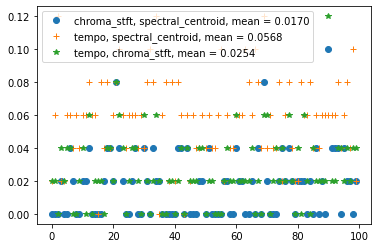

In [40]:
logreg1 = linear_model.LogisticRegression(C=1e5) #a large C disables regularization
logreg2 = linear_model.LogisticRegression(C=1e5)
logreg3 = linear_model.LogisticRegression(C=1e5)

error1 = []
error2 = []
error3 = []
y_plot = []

for i in range(100):
    perm = np.random.permutation(200) # new random permutation for every iteration
    X = X[perm] 
    Y = Y[perm]
    
    Y_test = np.array

    while np.sum(Y_test==-1) < 10 or np.sum(Y_test==1) < 10: # splitting the training and test set new for every iteration
        training_part = 0.75
    
        m_training = int(training_part * len(X))
        m_test = int(len(X) * (1 - training_part))

        X_training = X[:m_training]
        Y_training = Y[:m_training]

        X_test = X[m_training:]
        Y_test = Y[m_training:]
    
    logreg1.fit(np.delete(X_training, 0, 1), Y_training) # train logreg for every two features
    logreg2.fit(np.delete(X_training, 1, 1), Y_training)
    logreg3.fit(np.delete(X_training, 2, 1), Y_training)
    error_count1 = 0
    error_count2 = 0
    error_count3 = 0
    for w, x, y, z in zip(logreg1.predict(np.delete(X_test, 0, 1)), logreg2.predict(np.delete(X_test, 1, 1)), logreg3.predict(np.delete(X_test, 2, 1)), Y_test):
        if w != z:
            error_count1 += 1
        if x != z:
            error_count2 += 1
        if y != z:
            error_count3 += 1
    error1.append(error_count1/len(X_test)) # estimating the error for every 
    error2.append(error_count2/len(X_test))
    error3.append(error_count3/len(X_test))
    y_plot.append(i)
    
import matplotlib.pyplot as plt
%matplotlib inline

mean_er1 = 0
mean_er2 = 0
mean_er3 = 0
for x,y,z in zip(error1, error2, error3):
    mean_er1 += x
    mean_er2 += y
    mean_er3 += z

mean_er1 /= len(error1)
mean_er2 /= len(error1)
mean_er3 /= len(error1)
    
plt.plot(y_plot, error1, 'o', label='chroma_stft, spectral_centroid, mean = %.4f'%(mean_er1)) # plot error of every feature with mean feature
plt.plot(y_plot, error2, '+', label='tempo, spectral_centroid, mean = %.4f'%(mean_er2))
plt.plot(y_plot, error3, '*', label='tempo, chroma_stft, mean = %.4f'%(mean_er3))
plt.legend()
plt.show()


From the cell above it looks like the chroma_stft and the spectral_centroid are the best features

In [41]:


# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 1
index_feature2 = 2
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

Y_test = np.array

while np.sum(Y_test==-1) < 10 or np.sum(Y_test==1) < 10:
    training_part = 0.75
    
    m_training = int(training_part * len(X_reduced))
    m_test = int(len(X_reduced) * (1 - training_part))

    X_training = X_reduced[:m_training]
    Y_training = Y[:m_training]

    X_test = X_reduced[m_training:]
    Y_test = Y[m_training:]

Now learn a model using the training data and measure the performances.

In [42]:
# learning from training data

logareg5 = linear_model.LogisticRegression(C=1e5)
logareg5.fit(X_training, Y_training)

errors = 0
for x,y in zip(logareg5.predict(X_test), Y_test):
    if x != y:
        errors += 1
        

#print the error rate = fraction of misclassified samples
error_rate_test = errors/len(Y_test)
print(errors)


print("Error rate on test set: " + str(error_rate_test))

1
Error rate on test set: 0.02


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**

I created a mean error for all possible feature pairs for 100 iterations and shuffled the data new in every iteration. The mean error over the 100 iterations was the smallest for chroma_stft and spectral_centroid.
It was almost two times as accurate as the second best pair. So the decision was very easy.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_46168/1351488844.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


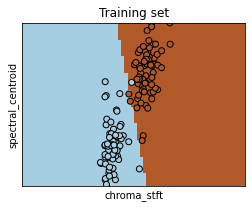

/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_46168/1351488844.py:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


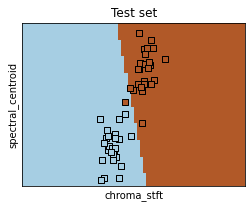

In [43]:
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization
logreg.fit(X_training, Y_training)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation
#a large C disables regularization

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [44]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [45]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [46]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)

print ("Cardinality of Training Set: ", m_t)

#shuffle the data
np.random.shuffle(Data)

#training data 

X_training = np.delete(Data, -1, 1)[:m_t]
Y_training = np.delete(Data, np.s_[:-1], 1)[:m_t]
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = np.delete(Data, -1, 1)[m_t:]
Y_test = np.delete(Data, np.s_[:-1], 1)[m_t:]
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (350, 13)
Training output data size:  (350, 1)
Test input data size:  (150, 13)
Test output data size:  (150, 1)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [47]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0. -0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [ 0.15025838 -0.02442252  0.00079648 -0.1228683  -0.03463818  0.10933605
 -0.07612783 -0.01809321  0.02804774  0.04148931  0.05459606 -0.23081942
 -0.04703925]
Std of the test input data: [1.35682381 0.91708745 0.98572811 0.77747579 0.8944718  1.02630976
 1.04632688 0.97114257 0.99216462 0.97708075 0.96510706 1.27040598
 0.9483014 ]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [48]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training)
w_np = np.squeeze(w_np, axis=1)
print("LS coefficients with numpy lstsq: \n", w_np)


# compute Residual sums of squares 
prediction_training = np.array([np.dot(w_np, i) for i in X_trainingH])
RSStr_hand = np.sum([(Y_training[i] - prediction_training[i]) **2 for i in range(len(Y_training))])

print("RSStr_hand:", RSStr_hand)
print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients with numpy lstsq: 
 [226.53142857 -11.59786635  14.79960301   6.46832329   9.16414961
 -21.54554832  23.11256316   0.20292399 -31.91398369  29.08114556
 -21.36286572 -21.40919435  11.32499522 -40.30807605]
RSStr_hand: 789285.822700529
RSS with numpy lstsq:  [789285.82270053]
Empirical risk with numpy lstsq: [2255.10235057]


/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_46168/3438764376.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training)


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [49]:
#compute predictions on training and test

prediction_training = np.array([np.dot(w_np, i) for i in X_trainingH])
prediction_test = np.array([np.dot(w_np, i) for i in X_testH])

#what about the loss for points in the test data?
RSS_test = RSStr_test = np.sum([(Y_test[i] - prediction_test[i]) **2 for i in range(len(Y_test))])

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test, '\n')

print('training data: \n')
for x, y in zip(prediction_training[:10], Y_training[:10]):
    print('estimated:', int(x), ' correct:', int(y[0]), '\n')
    
print('test data: \n')
for x, y in zip(prediction_test[:10], Y_test[:10]):
    print('estimated:', int(x), ' correct:', int(y[0]), '\n')

RSS on test data: 326939.044236497
Loss estimated from test data: 2179.5936282433136 

training data: 

estimated: 276  correct: 266 

estimated: 203  correct: 191 

estimated: 171  correct: 149 

estimated: 150  correct: 115 

estimated: 264  correct: 226 

estimated: 401  correct: 488 

estimated: 205  correct: 231 

estimated: 178  correct: 200 

estimated: 103  correct: 178 

estimated: 171  correct: 194 

test data: 

estimated: 304  correct: 294 

estimated: 134  correct: 110 

estimated: 278  correct: 334 

estimated: 184  correct: 109 

estimated: 189  correct: 161 

estimated: 241  correct: 222 

estimated: 209  correct: 218 

estimated: 214  correct: 212 

estimated: 292  correct: 220 

estimated: 84  correct: 83 



### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

The Results are not as good as I expected but the ones I saw are almost all inside the range of the RSS. The difference between the RSS of the training and test data is quite big. The RSS of the training data is almost twice as big. But also the training data is almost as twice as big as the test data. The difference between the loss nearly the same. Both about 2100 to 2400. This is because the training and test data still have differences and are not the same.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [50]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression().fit(X_training, Y_training)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

prediction_test = LinReg.predict(X_test)
prediction_training = LinReg.predict(X_training)

# return a prediction score based on the coefficient of determination
print('Training data: \n')
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))
print('Measure on trianing data:', 1-LinReg.score(X_training, prediction_training))

print('Test data: \n')
print("Measure on test data:", 1-LinReg.score(X_test, Y_test))
print('Measure on test data:', 1-LinReg.score(X_test, prediction_test))

Intercept: [226.53142857]
Least-Squares Coefficients: [[-11.59786635  14.79960301   6.46832329   9.16414961 -21.54554832
   23.11256316   0.20292399 -31.91398369  29.08114556 -21.36286572
  -21.40919435  11.32499522 -40.30807605]]
Training data: 

Measure on training data: 0.2633400791839202
Measure on trianing data: 0.0
Test data: 

Measure on test data: 0.25982023125183173
Measure on test data: 0.0
